**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

**Loading Dataset**

In [2]:
clients = pd.read_csv("Ecommerce Customers")

In [7]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Analyzing how the data is distributed**

In [8]:
clients.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Now, I will try to find some degree of relationship between numerical variables using seaborn**

The objective is understand wich variable contributes more to grow the Yearly Amount Spent

In [3]:
sns.set_palette("dark")
sns.set_style('dark')

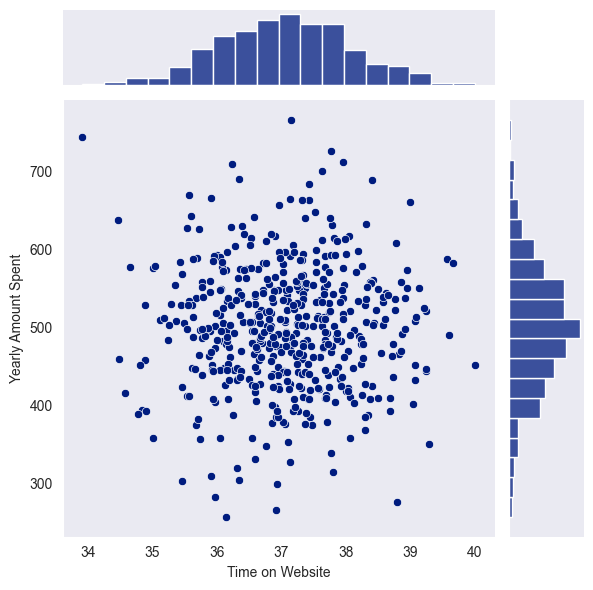

In [4]:
sns.jointplot(data=clients, x=clients['Time on Website'], y=clients['Yearly Amount Spent'], kind='scatter')

Based on the graph, variable Time on Website doesn't seem to have much correlation with Yearly Amount Spent.

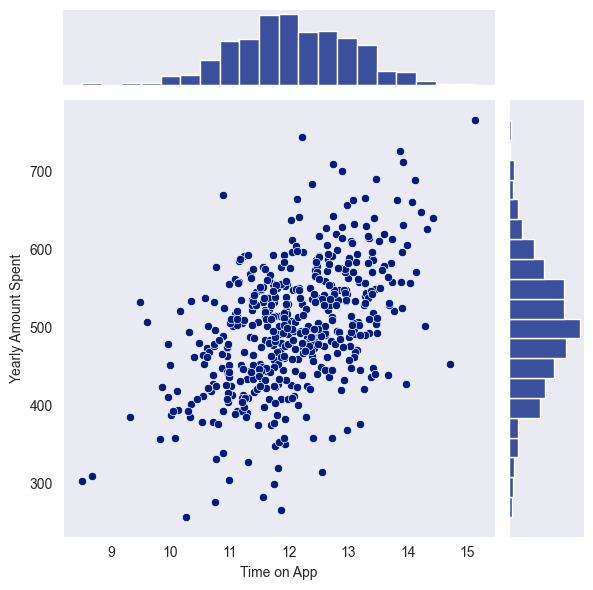

In [54]:
sns.jointplot(data=clients, x=clients['Time on App'], y=clients['Yearly Amount Spent'], kind='scatter')


The variable Time on App has a much more linear correlation with Yearly Amount Spent

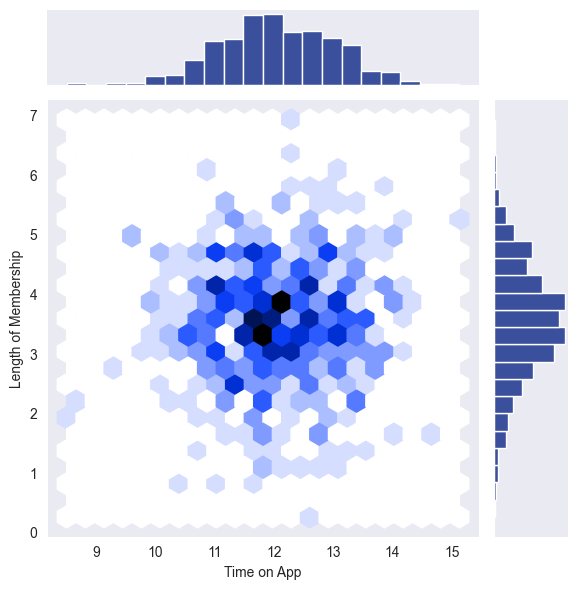

In [5]:
sns.jointplot(data=clients, x=clients['Time on App'], y=clients['Length of Membership'], kind='hex')


Now, i will use Seaborn Pairplot method to try to better observe the correlation between the data

c:\Users\Pedro Nunes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


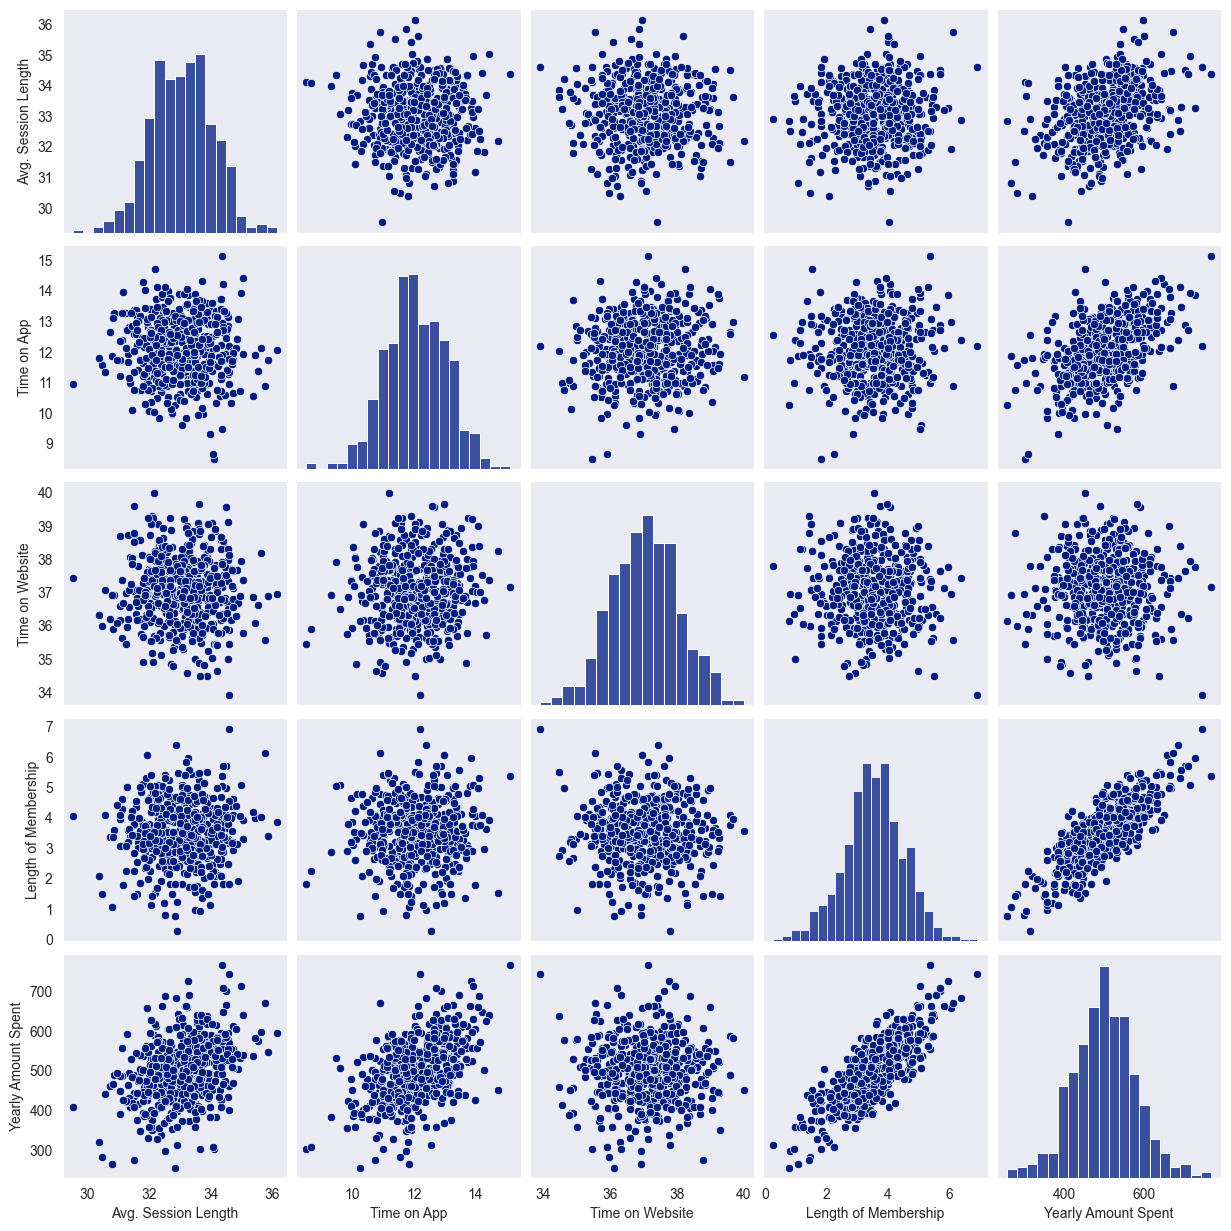

In [6]:
sns.pairplot(clients)

The graphs clearly show a linear correlation between Lenght of Membership and Yearly Amount Spent

d:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



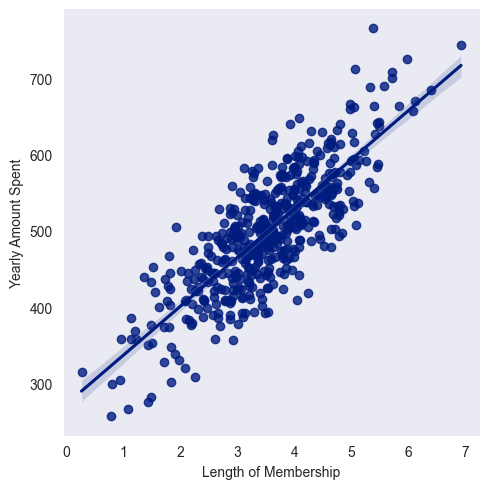

In [57]:
sns.lmplot(data=clients, x='Length of Membership', y='Yearly Amount Spent')

**Now, I will implement a machine learning model called Linear Regression, and measure whether this model would be ideal for modeling a solution to the problem.**

In [7]:
X= clients.loc[:, "Avg. Session Length":"Length of Membership"]
Y = clients['Yearly Amount Spent']

In [8]:
from sklearn.model_selection import train_test_split


Now, i will separate 30% of my Dataset to use in the final, called x_test and y_test, to measure if my model is working well

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()               

Now, I will train the model with de training data

In [11]:
lm.fit(x_train, y_train)

LinearRegression()

In [12]:
lm.predict(x_test)

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Now, i will compare the prediction that the model can do and the real values. (Using the test data)

Text(0, 0.5, 'Predicted Y')

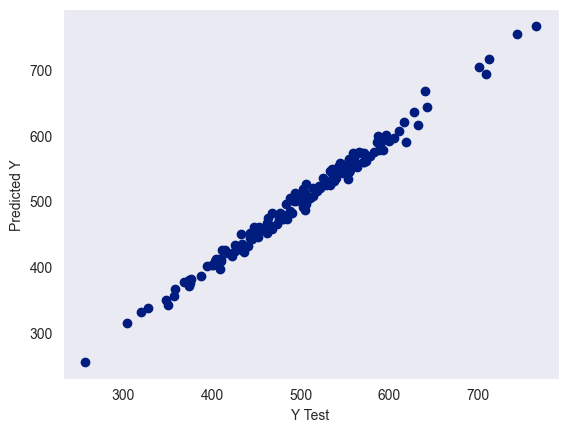

In [13]:
plt.scatter(y_test, lm.predict(x_test))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [14]:
fig = go.Figure(data=go.Scatter(y=y_test, name='Real Values'))
fig.add_trace(go.Scatter(y=lm.predict(x_test), name='Predicted Values'))
fig.update_layout(title='Comparing Values (Linear Regression)')
fig.update_traces(hoverinfo='name+y')
fig.show()

The model worked incredibly well for this dataset


**Now I will measure model errors:**

Mean Absolute Error

Mean Squared Error

Root Mean Square Error



In [15]:
from sklearn import metrics

predictions = lm.predict(x_test)

In [16]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  7.228148653430826
Mean Squared Error:  79.81305165097427
Root Mean Squared Error:  8.933815066978624


c:\Users\Pedro Nunes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



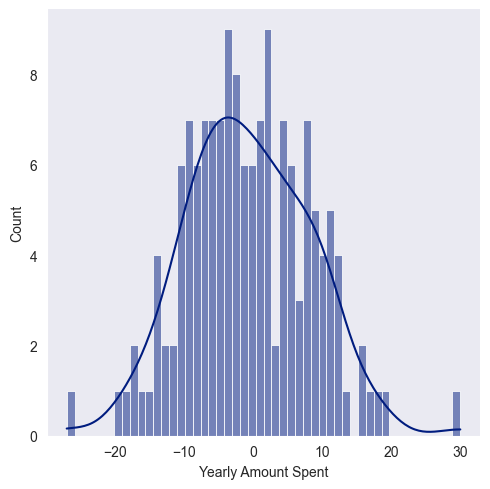

In [17]:
sns.displot((y_test-predictions), bins=50, kde=True)

**Measuring the coefficients to see the weight of each variable**

In [19]:
coefs = pd.DataFrame(lm.coef_, X.columns)
coefs.columns = ['Coeffeciet']
coefs

,Coeffeciet
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
